# Ratings

In this notebook, we plot **Figure 3 (a)**. To do so, we need parse all the ratings and put them in a JSON file.

*No requirement is needed to run this notebook.*

**Benchmark time**: This notebook has been run on a Dell Latitude (ElementaryOS 0.4.1 Loki, i7-7600U, 16GB RAM).

In [1]:
import os
os.chdir('..')

In [2]:
# Helpers functions
from python.helpers import parse

# Libraries for preparing data
import json
import numpy as np

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib

# Folders
data_folder = '../data/'
fig_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# General info for plotting
colors = {'ba': (232/255,164/255,29/255), 
          'rb': (0/255,152/255,205/255)}

labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

# Check that folders exist
if not os.path.exists(data_folder + 'prepared'):
    os.makedirs(data_folder + 'prepared')
    
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

## Parse the ratings

The cell below is used to parse the ratings and put them in a JSON file.

In [3]:
%%time

ratings = {'ba': [], 'rb': []}

# Go through RB and BA
for key in ratings.keys():
    print('Parse {} ratings'.format(key.upper()))
    # Get the iterator
    gen = parse(data_folder + key + '/ratings.txt.gz')
    
    # Go through the iterators
    for item in gen:        
        ratings[key].append(float(item['rating']))

# Save all the ratings
with open(data_folder + 'prepared/all_ratings.json', 'w') as outfile:
    json.dump(ratings, outfile)

Parse BA ratings
Parse RB ratings
CPU times: user 9min 41s, sys: 1.82 s, total: 9min 43s
Wall time: 9min 43s


## Plot all the ratings

The cell below is used to plot all the ratings as done for Figure 3 (a).

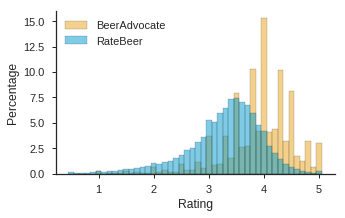

In [4]:
with open(data_folder + 'prepared/all_ratings.json', 'r') as infile:
    ratings = json.load(infile)

plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in bin_edges.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, 
            facecolor=colors[key], edgecolor='k', alpha=0.5, 
            label=labels[key])
    
plt.ylabel('Percentage')
plt.xlabel('Rating')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.savefig(fig_folder + 'ratings_all_beers.pdf', bbox_inches='tight')